In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./../../data/multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


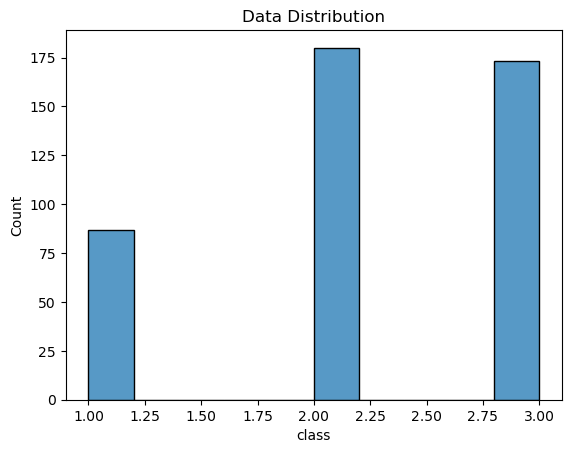

In [3]:
sns.histplot(data=df, x='class')
plt.title('Data Distribution')
plt.show()

In [4]:
X=df[['Region', 'Fresh',    'Milk', 'Grocery',  'Frozen',   'Detergents_Paper', 'Delicassen']].copy()
y=df[['class']].copy()

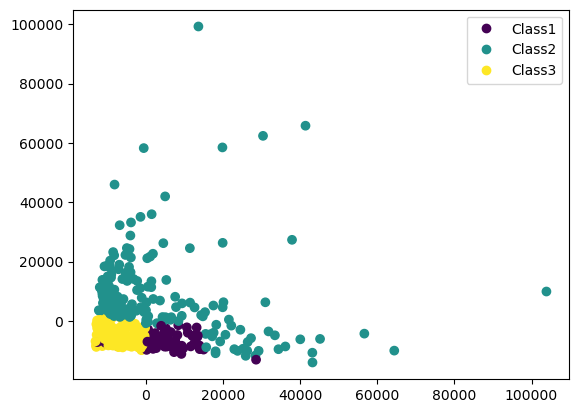

In [5]:
from sklearn.decomposition import PCA

def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

pca = PCA(n_components=2)
visualize = pca.fit_transform(X)

scatter_visualize(visualize[:, 0], visualize[:, 1], y.values[:, 0])

### KNN Scratch

In [6]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

In [7]:
print(X.shape)
print(X_train_val.shape, X_test.shape)
print(X_train.shape, X_val.shape)

(440, 7)
(330, 7) (110, 7)
(247, 7) (83, 7)


In [8]:
X_train.shape, y_train.shape


((247, 7), (247, 1))

In [9]:
y_train.value_counts()

class
3        99
2        95
1        53
Name: count, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)


In [20]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()
X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)
y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]


In [21]:
dist = np.sqrt(np.sum((X_val_scaled[50]-X_sm)**2,axis=1) )

print(dist.shape)

(297,)


In [22]:
# Storing distance and Class labels together
distances = [(dist[i],y_sm[i]) for i in range(len(dist)) ]

# sort the distances
distances = sorted(distances)

In [23]:
distances[5]

(0.30594720047836155, 3)

In [24]:
# Nearest/First K points
distances = distances[:5]
distances

[(0.2038928034867564, 3),
 (0.215246420703559, 3),
 (0.23086600357779685, 3),
 (0.2863630807282208, 3),
 (0.3022290017919612, 3)]

In [25]:
distances = np.array(distances)
distances
classes_counts = np.unique(distances[:,1],return_counts=True)
classes_counts
index = classes_counts[1].argmax()
pred = classes_counts[0][index]
print('kNN prediction:',pred)

kNN prediction: 3.0


In [26]:
distances = np.array(distances)
classes_counts = np.unique(distances[:,1],return_counts=True)

index = classes_counts[1].argmax()
pred = classes_counts[0][index]

print('kNN prediction:',pred)

kNN prediction: 3.0


In [27]:
index = classes_counts[0].argmax()
classes_counts[0][index]

3.0

In [28]:
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

In [29]:
pred,neighbors = knn(X_sm, y_sm, X_val_scaled[50],5)

print(f'k nearest neighbors with the distance and class label :{neighbors}')

print(f'The predicted class label: {pred}')

k nearest neighbors with the distance and class label :[[0.2038928  3.        ]
 [0.21524642 3.        ]
 [0.230866   3.        ]
 [0.28636308 3.        ]
 [0.302229   3.        ]]
The predicted class label: 3


In [30]:
from sklearn.metrics import confusion_matrix
y_pred = []

for i in range(X_test_scaled.shape[0]):
    output,_ = knn(X_sm, y_sm, X_test_scaled[i],5)
    y_pred.append(output)

cm = confusion_matrix(y_test,y_pred)
cm

array([[17,  1,  2],
       [ 5, 39,  3],
       [ 0,  1, 42]], dtype=int64)

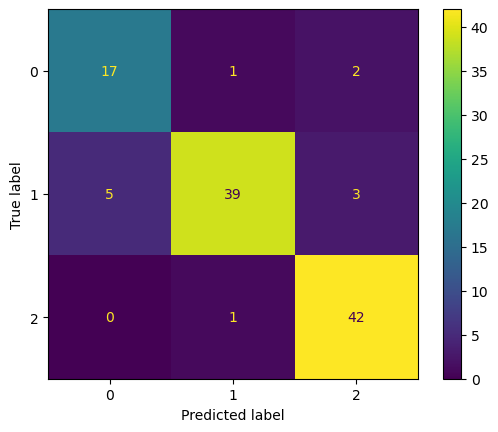

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.85      0.77      0.81        22
           2       0.83      0.95      0.89        41
           3       0.98      0.89      0.93        47

    accuracy                           0.89       110
   macro avg       0.89      0.87      0.88       110
weighted avg       0.90      0.89      0.89       110



In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_sm, y_sm)

KNeighborsClassifier(metric='euclidean')

In [37]:
knn.score(X_val_scaled, y_val) 

0.891566265060241

              precision    recall  f1-score   support

           1       0.86      0.71      0.77        17
           2       0.89      0.97      0.93        35
           3       0.90      0.90      0.90        31

    accuracy                           0.89        83
   macro avg       0.89      0.86      0.87        83
weighted avg       0.89      0.89      0.89        83



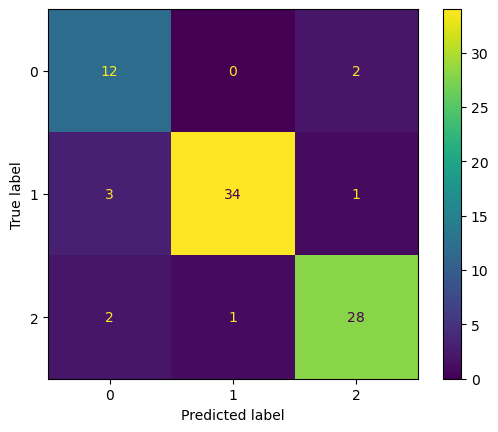

In [54]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_val_scaled)
print(classification_report(y_pred,y_val))
cm = confusion_matrix(y_val,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [44]:
knn.score(X_test_scaled, y_test)

0.8909090909090909

              precision    recall  f1-score   support

           1       0.85      0.77      0.81        22
           2       0.83      0.95      0.89        41
           3       0.98      0.89      0.93        47

    accuracy                           0.89       110
   macro avg       0.89      0.87      0.88       110
weighted avg       0.90      0.89      0.89       110



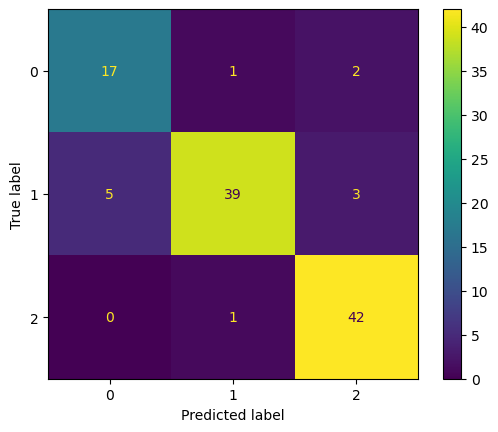

In [52]:
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_pred, y_test))
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

# Hyperparameter Tuning in KNN

In [58]:
acc = []
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_sm, y_sm)
    a_score = knn.score(X_val_scaled, y_val)
    acc.append(a_score)

Text(0, 0.5, 'Accuracy')

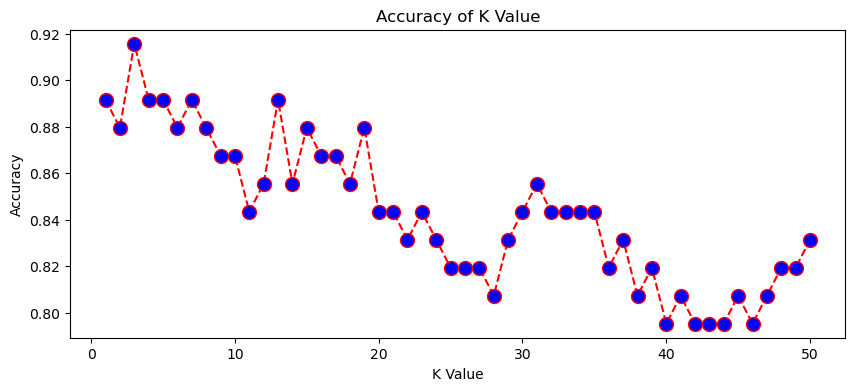

In [64]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, 51), acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

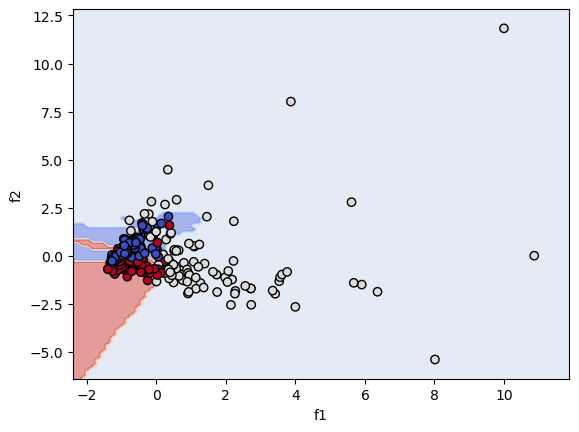

In [92]:
pca = PCA(n_components=2)
X_train_cols = pca.fit_transform(X_sm)
classifier = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
classifier.fit(X_train_cols, y_sm)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier,
                                              X_train_cols,
                                              response_method="predict",
                                              xlabel='f1', ylabel='f2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(X_train_cols[:, 0], X_train_cols[:, 1],
                 c=y_sm, edgecolor="k",
                 cmap=plt.cm.coolwarm)


plt.show()

In [93]:
import pandas as pd
import numpy as np

df_imp = pd.read_csv('knn_imputation.csv')
df_imp.drop(['Unnamed: 0'],axis=1,inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'knn_imputation.csv'